In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1.get_object(Bucket='1',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body,parse_dates=True)
df_data_1.head()

Bucket='1'

In [2]:
df_data_1.to_pickle('./df_raw.pkl')

client_1.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')

client_1.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

df_NY = pd.read_pickle('./df_raw_local.pkl')

In [3]:
df_NY.head(3)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-15T21:20:00.000,45397440,HEAT/HOT WATER,10456.0,1250 FRANKLIN AVENUE,FRANKLIN AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830871,-73.902850,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-15T10:54:04.000,45396490,GENERAL,10039.0,208 WEST 151 STREET,WEST 151 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.825551,-73.936620,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-15T19:45:27.000,45397525,HEAT/HOT WATER,10039.0,247 WEST 145 STREET,WEST 145 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.822237,-73.940471,NaN,RESIDENTIAL BUILDING,Open


In [4]:
df_NY_HEAT=df_NY.loc[df_NY['complaint_type'] == 'HEAT/HOT WATER']
df_NY_HEAT['borough'].value_counts().head(3)

BRONX        405046
BROOKLYN     380166
MANHATTAN    282484
Name: borough, dtype: int64

In [5]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.show()

<Figure size 1000x500 with 0 Axes>

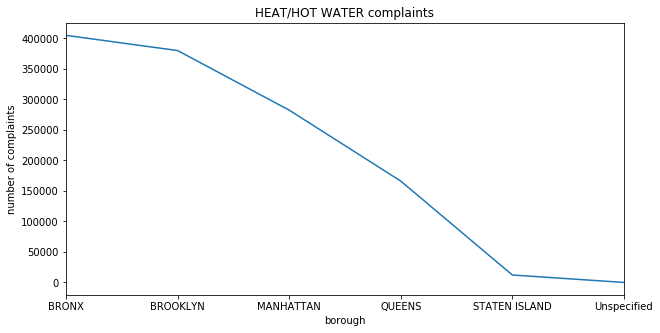

In [6]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
df_NY_HEAT['borough'].value_counts().plot()
plt.title("HEAT/HOT WATER complaints")
plt.xlabel("borough")
plt.ylabel("number of complaints")
plt.show()

In [7]:
df_NY_HEAT['incident_zip'].value_counts().head(3)

11226.0    41301
10458.0    38422
10467.0    37626
Name: incident_zip, dtype: int64

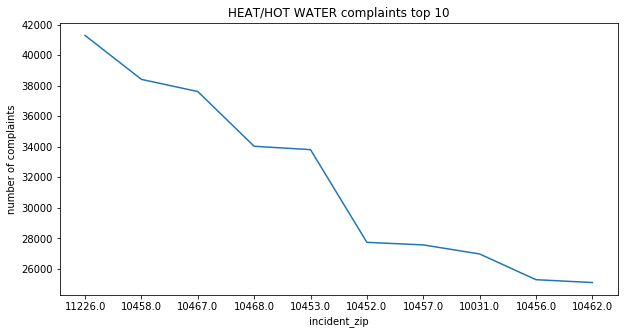

In [8]:
top10=df_NY_HEAT['incident_zip'].value_counts()
top10=top10.rename_axis('incident_zip').reset_index(name='counts')
top10['incident_zip']=top10['incident_zip'].astype(str)
plt.figure(figsize=(10, 5))
plt.plot(top10['incident_zip'][0:10],top10['counts'][0:10])
plt.title("HEAT/HOT WATER complaints top 10")
plt.xlabel("incident_zip")
plt.ylabel("number of complaints")
plt.show()

In [9]:
df_NY_HEAT['street_name'].value_counts().head(3)

GRAND CONCOURSE    22011
BROADWAY           15263
ELMHURST AVENUE    11153
Name: street_name, dtype: int64

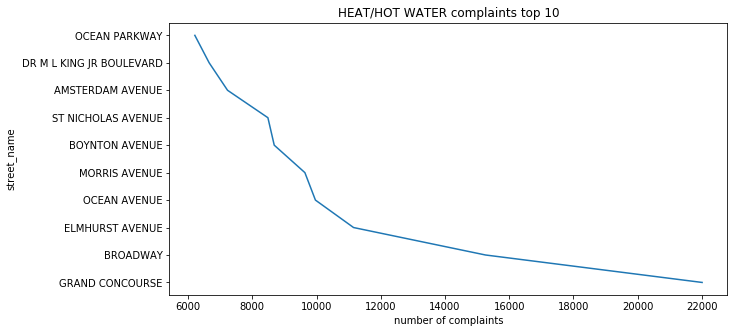

In [10]:
top10=df_NY_HEAT['street_name'].value_counts()
top10=top10.rename_axis('street_name').reset_index(name='counts')
top10['street_name']=top10['street_name'].astype(str)
plt.figure(figsize=(10, 5))
plt.plot(top10['counts'][0:10],top10['street_name'][0:10])
plt.title("HEAT/HOT WATER complaints top 10")
plt.xlabel("number of complaints")
plt.ylabel('street_name')
plt.show()

In [11]:
df_NY_HEAT.groupby(['borough','street_name'])['incident_zip'].value_counts().sort_values(ascending=False).head(5)

borough    street_name      incident_zip
QUEENS     ELMHURST AVENUE  11373.0         11086
BRONX      BOYNTON AVENUE   10472.0          7950
MANHATTAN  ARDEN STREET     10040.0          5728
BRONX      GRAND CONCOURSE  10451.0          5564
BROOKLYN   SHORE ROAD       11209.0          4750
Name: incident_zip, dtype: int64